In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("enferbucara.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110693 entries, 0 to 110692
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   ORDEN                               110693 non-null  int64 
 1   Sexo                                110693 non-null  object
 2   Regimen                             110693 non-null  object
 3   Artritis                            110693 non-null  int64 
 4   Diabetes                            110693 non-null  int64 
 5   Hipertensión                        110693 non-null  int64 
 6   EPOC                                110693 non-null  int64 
 7   Asma                                110693 non-null  int64 
 8   Insuficiencia cardiaca              110693 non-null  int64 
 9   Cáncer                              110693 non-null  int64 
 10  ERC                                 110693 non-null  object
 11  TIPO ERC       


Valores faltantes por columna:
ORDEN                                 0
Sexo                                  0
Regimen                               0
Artritis                              0
Diabetes                              0
Hipertensión                          0
EPOC                                  0
Asma                                  0
Insuficiencia cardiaca                0
Cáncer                                0
ERC                                   0
TIPO ERC                              0
Insuficiencia renal cronica           0
ERC TRR                               0
Huerfanas- Hemofilias y otras Coag    0
Cirugia Cardiaca                      0
Trasplantados                         0
EAPB                                  0
COMUNA                                0
BARRIO_VER                            0
GRUPO_ ETAREO                         0
CICLO_DE_VIDA                         0
dtype: int64


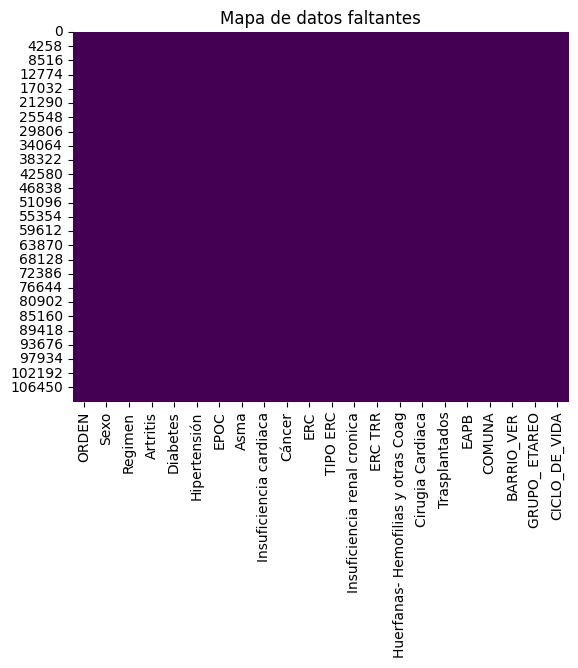

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()


Valores faltantes por columna:
Cáncer           0
Trasplantados    0
Sexo             0
COMUNA           0
GRUPO_ ETAREO    0
dtype: int64


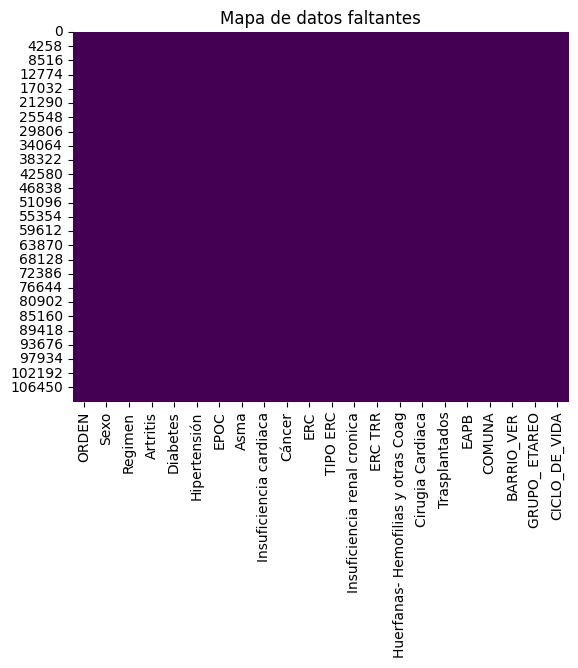

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df_seleccionado.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("enferbucara.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110693 entries, 0 to 110692
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   ORDEN                               110693 non-null  int64 
 1   Sexo                                110693 non-null  object
 2   Regimen                             110693 non-null  object
 3   Artritis                            110693 non-null  int64 
 4   Diabetes                            110693 non-null  int64 
 5   Hipertensión                        110693 non-null  int64 
 6   EPOC                                110693 non-null  int64 
 7   Asma                                110693 non-null  int64 
 8   Insuficiencia cardiaca              110693 non-null  int64 
 9   Cáncer                              110693 non-null  int64 
 10  ERC                                 110693 non-null  object
 11  TIPO ERC                            110

In [4]:
# Classify variables
categorical_cols = []
numerical_cols = []
discrete_cols = []
continuous_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)
        # For simplicity, we'll assume int64 are discrete and float64 are continuous for now.
        # A more thorough analysis might be needed for a definitive classification.
        if df[col].dtype == 'int64':
            discrete_cols.append(col)
        elif df[col].dtype == 'float64':
            continuous_cols.append(col)

print("Categorical variables:", categorical_cols)
print("Numerical variables:", numerical_cols)
print("Discrete numerical variables:", discrete_cols)
print("Continuous numerical variables:", continuous_cols)

Categorical variables: ['Sexo', 'Regimen', 'ERC', 'TIPO ERC', 'Insuficiencia renal cronica', 'ERC TRR', 'EAPB', 'COMUNA', 'BARRIO_VER', 'GRUPO_ ETAREO', 'CICLO_DE_VIDA']
Numerical variables: ['ORDEN', 'Artritis', 'Diabetes', 'Hipertensión', 'EPOC', 'Asma', 'Insuficiencia cardiaca', 'Cáncer', 'Huerfanas- Hemofilias y otras Coag', 'Cirugia Cardiaca', 'Trasplantados']
Discrete numerical variables: ['ORDEN', 'Artritis', 'Diabetes', 'Hipertensión', 'EPOC', 'Asma', 'Insuficiencia cardiaca', 'Cáncer', 'Huerfanas- Hemofilias y otras Coag', 'Cirugia Cardiaca', 'Trasplantados']
Continuous numerical variables: []


Categorical variables: ['Sexo', 'Regimen', 'COMUNA']

Numerical variables: ['Asma', 'Insuficiencia cardiaca', 'Cáncer']

Visualizing Sexo...


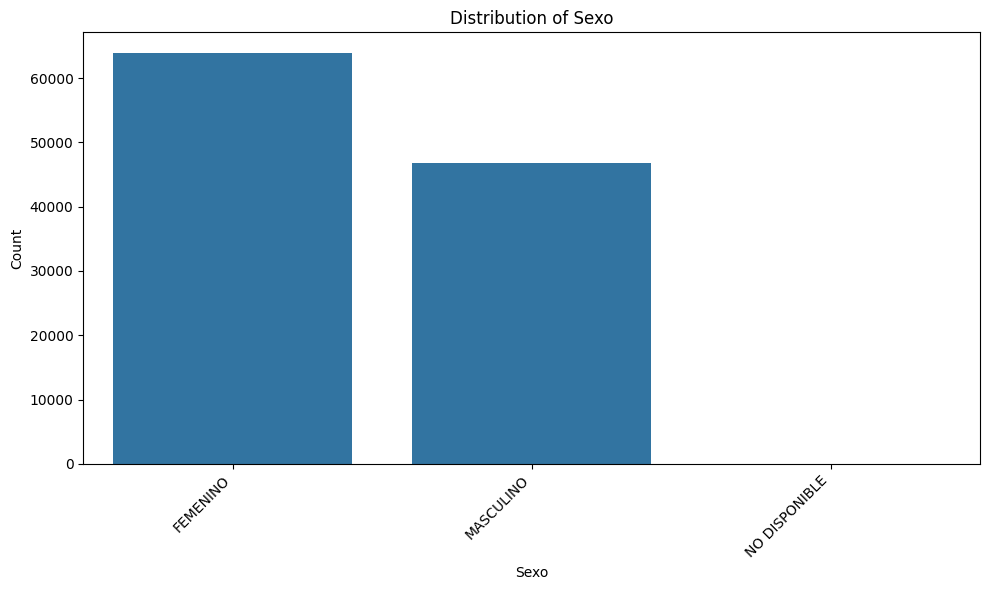

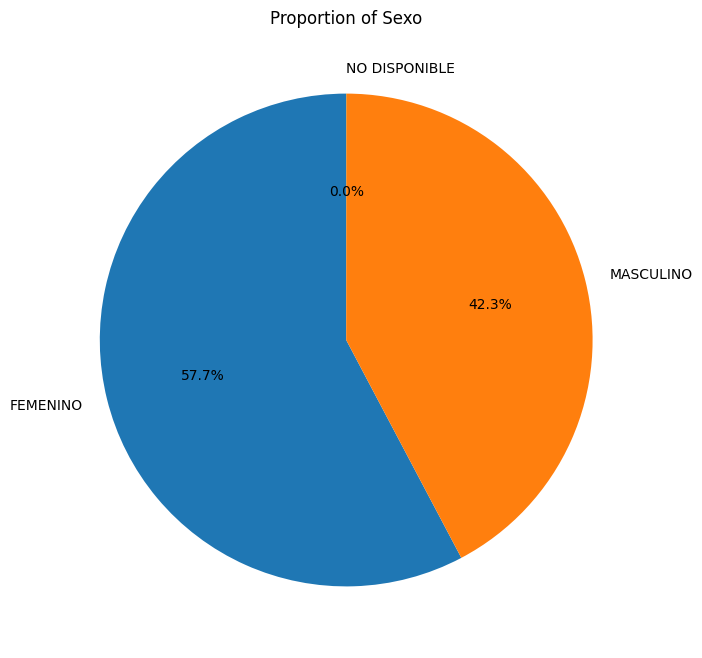

Visualizing Regimen...


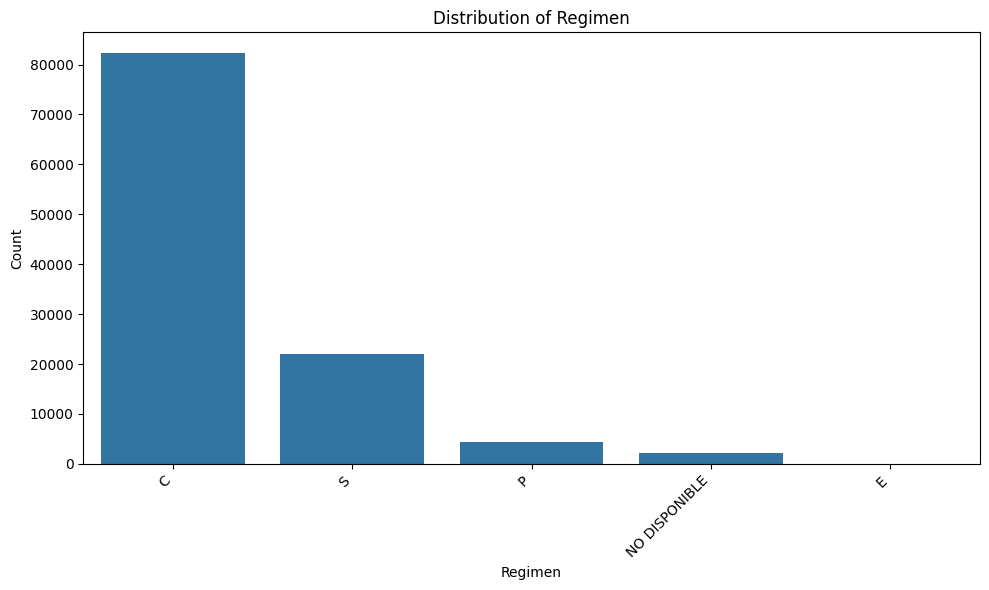

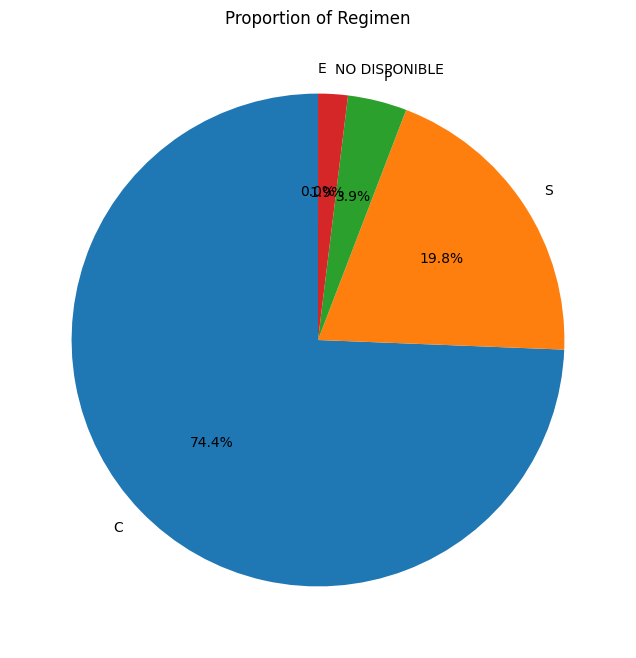

Visualizing COMUNA...


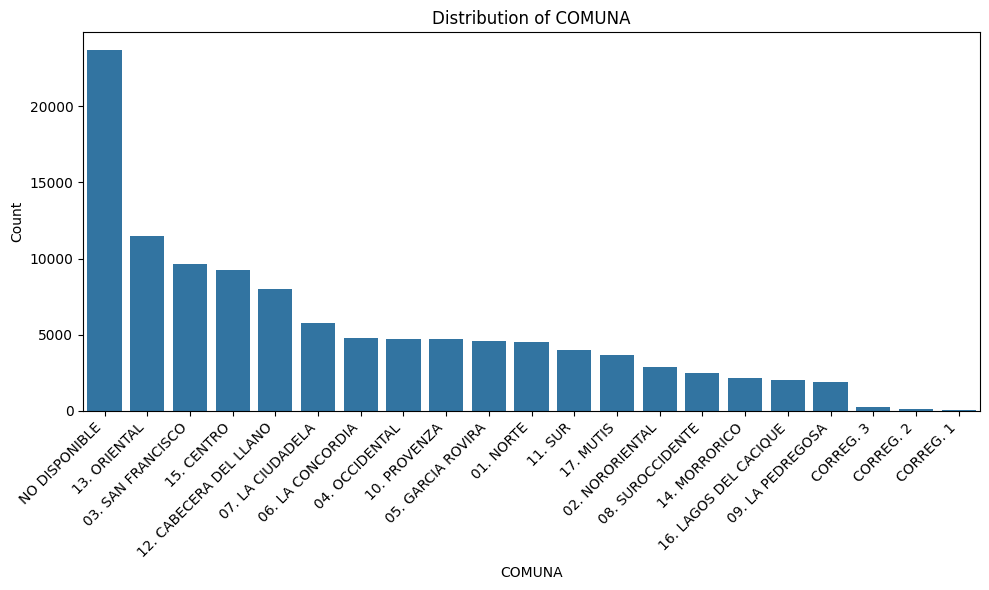

Skipping pie chart for COMUNA due to a large number of unique values.


In [6]:
# Variables to visualize (only categorical)
variables_to_visualize = ['Sexo', 'Regimen', 'COMUNA']

for col in variables_to_visualize:
    # Check if the column exists in the dataframe
    if col in df.columns:
        print(f"Visualizing {col}...")

        # Bar chart
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Pie chart (only if there are not too many unique values)
        if df[col].nunique() <= 15:  # Limit the number of slices for readability
            plt.figure(figsize=(8, 8))
            df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
            plt.title(f'Proportion of {col}')
            plt.ylabel('') # Hide the default y-label
            plt.show()
        else:
            print(f"Skipping pie chart for {col} due to a large number of unique values.")
    else:
        print(f"Column '{col}' not found in the dataframe.")

Visualizing Asma...


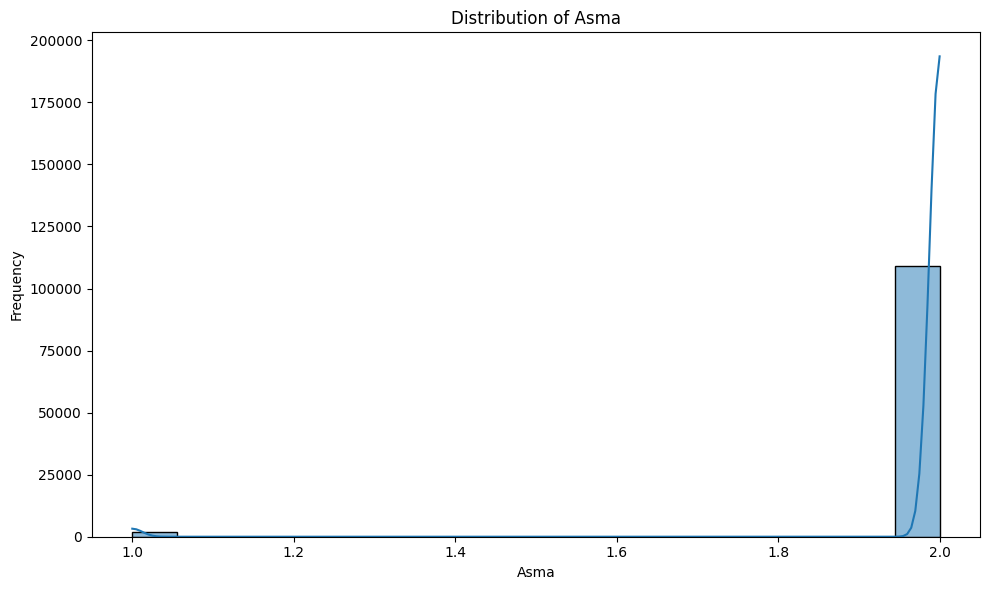

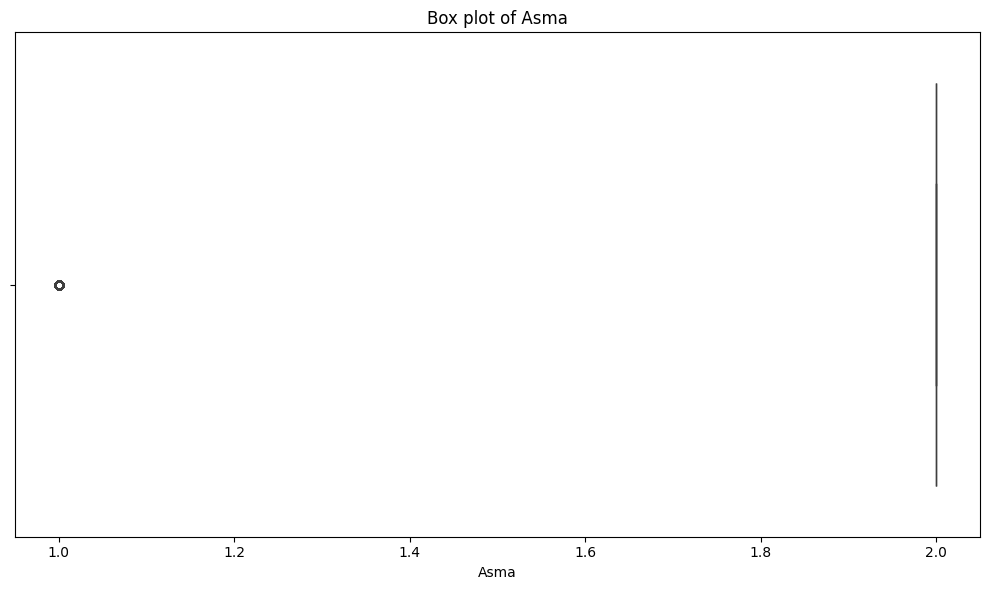

Visualizing Insuficiencia cardiaca...


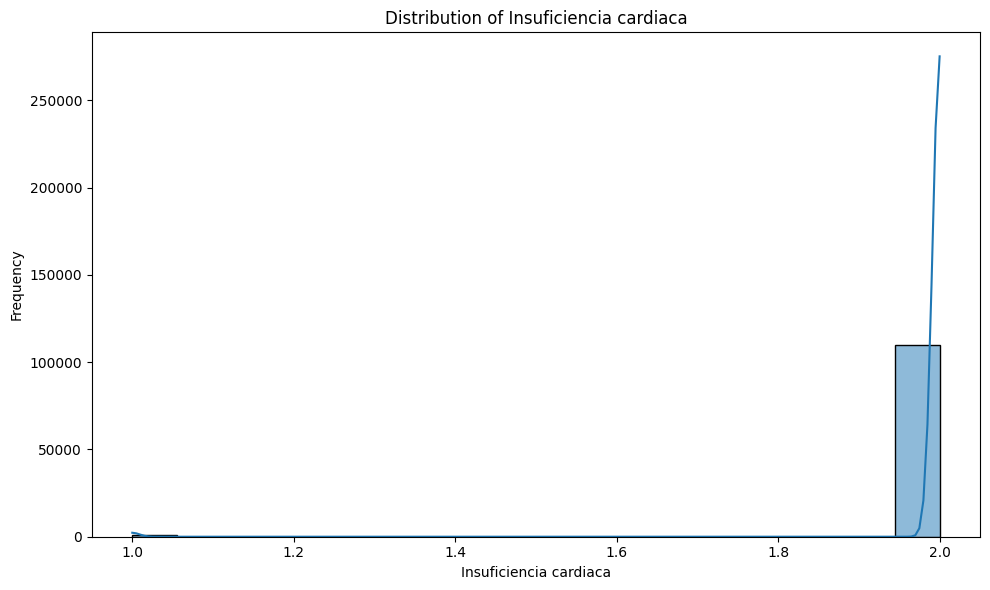

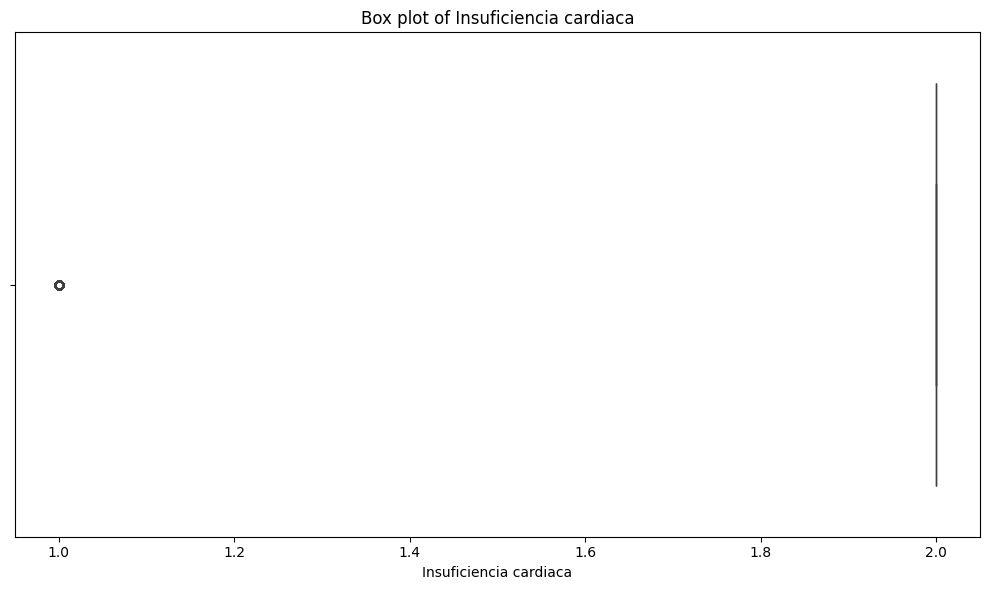

Visualizing Cáncer...


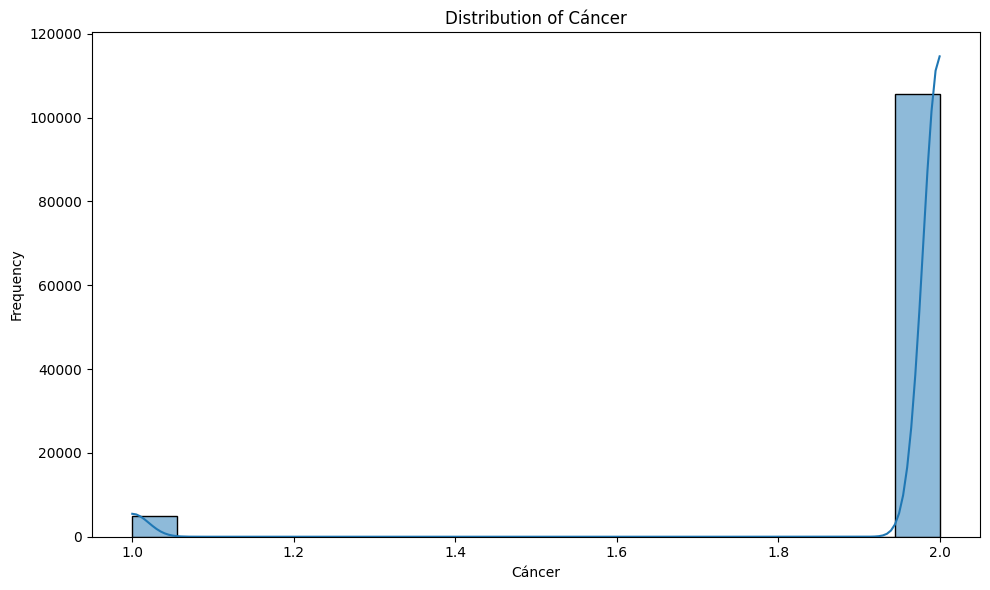

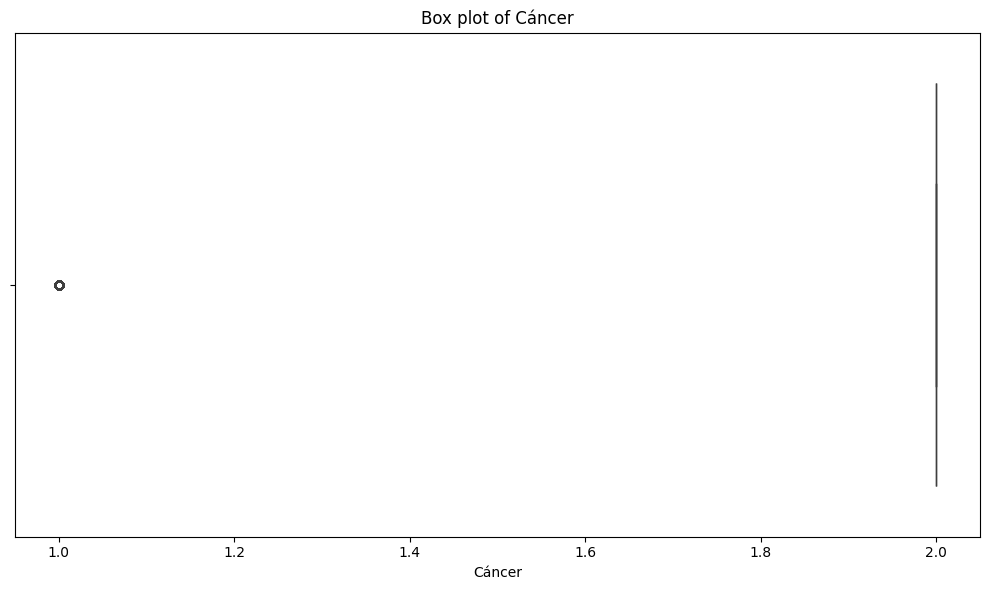

In [7]:
# Variables to visualize (numerical)
numerical_variables_to_visualize = ['Asma', 'Insuficiencia cardiaca', 'Cáncer']

for col in numerical_variables_to_visualize:
    # Check if the column exists in the dataframe
    if col in df.columns:
        print(f"Visualizing {col}...")

        # Histogram
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

        # Box plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=col)
        plt.title(f'Box plot of {col}')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found in the dataframe.")